In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import ax_text
from pyfonts import load_font
from drawarrow import ax_arrow

C:\Users\MELİH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Monte Carlo Simulation for Pi

In [16]:
np.random.seed(99)

MCN=1000 
mci=0
pi_estimate = 0

points = pd.DataFrame(columns=["X","Y","in_or_out","pi's"])


for mci in range(MCN):
    X = np.random.uniform(-1,1)
    Y = np.random.uniform(-1,1)
    
    U = np.sqrt(X*X + Y*Y) 
    
    if U < 1: # Checking whether it is inside or outside the unit circle
        in_or_out = 1 
    else:
        in_or_out = 0
    
    pi_estimate = ((pi_estimate * ((mci+1)-1)) + in_or_out *4) / (mci+1) 
    
    points.loc[mci] = [X,Y,in_or_out,pi_estimate]
    
print(f"\nPi Estimate = {pi_estimate}\n")


Pi Estimate = 3.1399999999999997



In [17]:
points.sample(5)

X         Y  in_or_out      pi's
931  0.896300 -0.351551        1.0  3.145923
838  0.858974  0.038700        1.0  3.141836
547  0.206888  0.369503        1.0  3.138686
424  0.580013 -0.090752        1.0  3.115294
448  0.243090 -0.997336        0.0  3.126949

In [18]:
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
arrow_props = dict(color='black', tail_width=0.15, linewidth=0.4, head_width=4, head_length=6)

## Visualization of the Monte Carlo Simulation

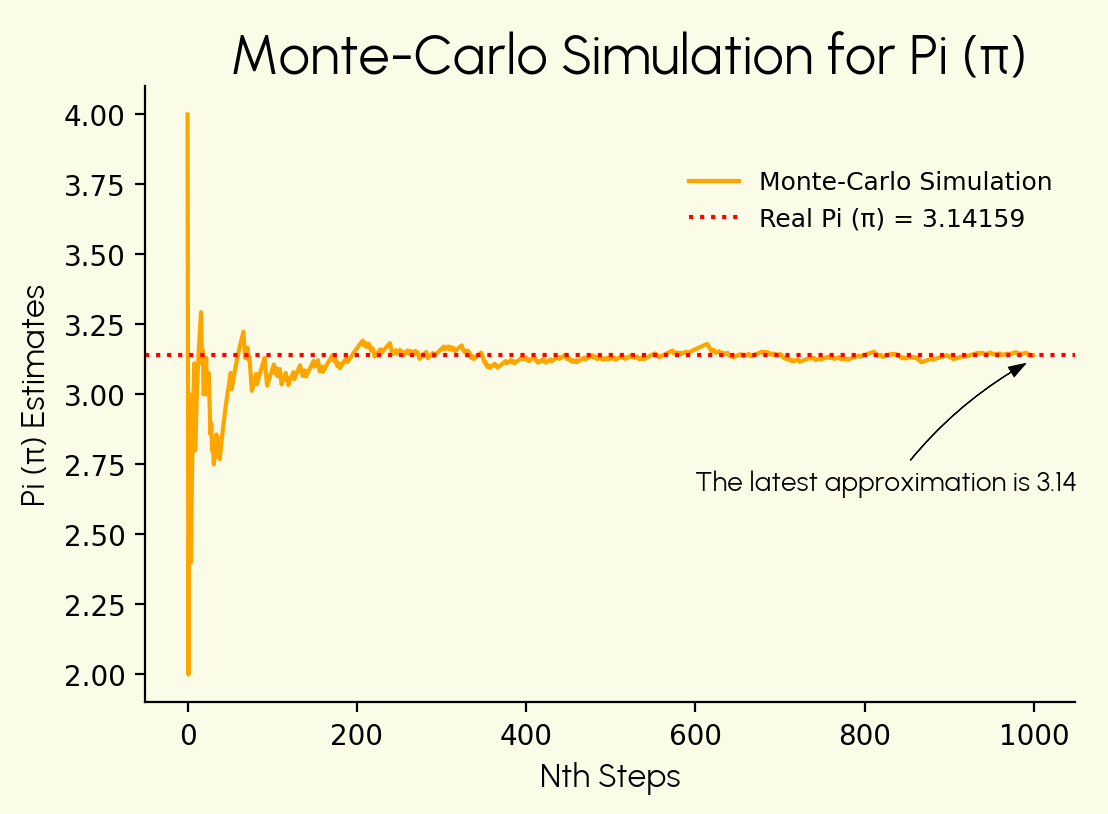

In [32]:
fig,ax = plt.subplots(figsize=(6,4),dpi=200)
fig.patch.set_facecolor('#FBFCE8')
ax.set_facecolor('#FBFCE8')

ax.plot(points["pi's"],label="Monte-Carlo Simulation",color="orange")
ax.axhline(y=np.pi,label=f"Real Pi (π) = {np.pi:.5f}",color="r",ls=":")

s= "Monte-Carlo Simulation for Pi (π)"
ax_text(x=50, y=4.3, s=s, font=font, size=20, ha='left')


ax_arrow(tail_position=(850, 2.75), head_position=(996, 3.12), invert=True, **arrow_props)

s=f"The latest approximation is {pi_estimate:.2f}"
ax_text(x=600,y=2.73,s=s,font=font,size=10,ha="left")

ax.legend(frameon=False, loc='upper right', bbox_to_anchor=(1, 0.9),fontsize=9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Nth Steps",font=font,size=12)
plt.ylabel("Pi (π) Estimates",font=font,size=12)

## Visualization of the Shots Made to the Unit Circle

In a 1000-step Monte Carlo simulation, the shots falling inside the unit circle were visualized.

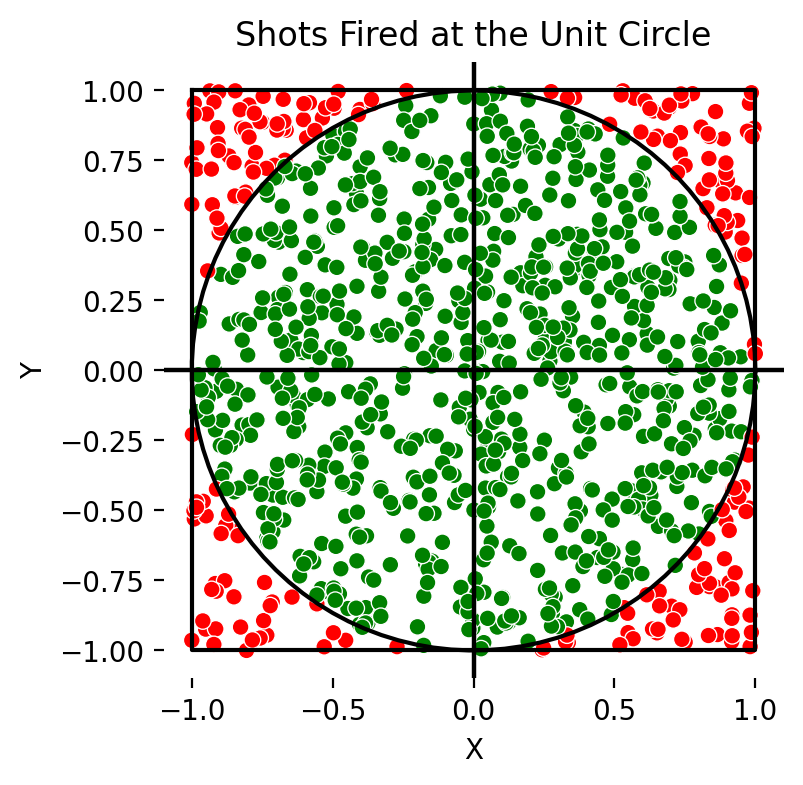

In [6]:
np.random.seed(99)

fig,ax = plt.subplots(figsize=(4,4),dpi=200)

theta = np.linspace(0, 2 * np.pi, 100)

x_circle = np.cos(theta)
y_circle = np.sin(theta)

square_x = [-1, 1, 1, -1, -1]
square_y = [1, 1, -1, -1, 1]

ax.plot(x_circle, y_circle, color="black")


ax.plot(square_x, square_y, color='black')
ax.axhline(0, color='black',linewidth=1.6)
ax.axvline(0, color='black',linewidth=1.6)

palette = {0: "red", 1: "green"}
sns.scatterplot(data=points,x="X",y="Y",hue="in_or_out",ax=ax,palette=palette)

ax.set_title("Shots Fired at the Unit Circle")

ax.get_legend().remove()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Pi estimate based on the average of the estimates

Monte Carlo simulation was run 1000 times, and the Pi estimate was calculated by taking the average of the last obtained Pi values.

In [12]:
np.random.seed(99)

MCN=1000
mci=0
Pi_estimate = 0
in_or_out = 0
pi_estimates=[]

for i in range(10000):
    
    for mci in range(MCN):
        
        X = np.random.uniform(-1,1)
        Y = np.random.uniform(-1,1)

        U = np.sqrt(X*X + Y*Y)

        if U < 1:
            in_or_out = 1 
        else:
            in_or_out = 0

        Pi_estimate = ((Pi_estimate * ((mci+1)-1)) + in_or_out *4) / (mci+1)
        
    pi_estimates.append(Pi_estimate)
        
print(f"\nLast Pi Estimate: {np.mean(pi_estimates)}")


Last Pi Estimate: 3.1414303999999995


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Density Plot of Pi Estimates')

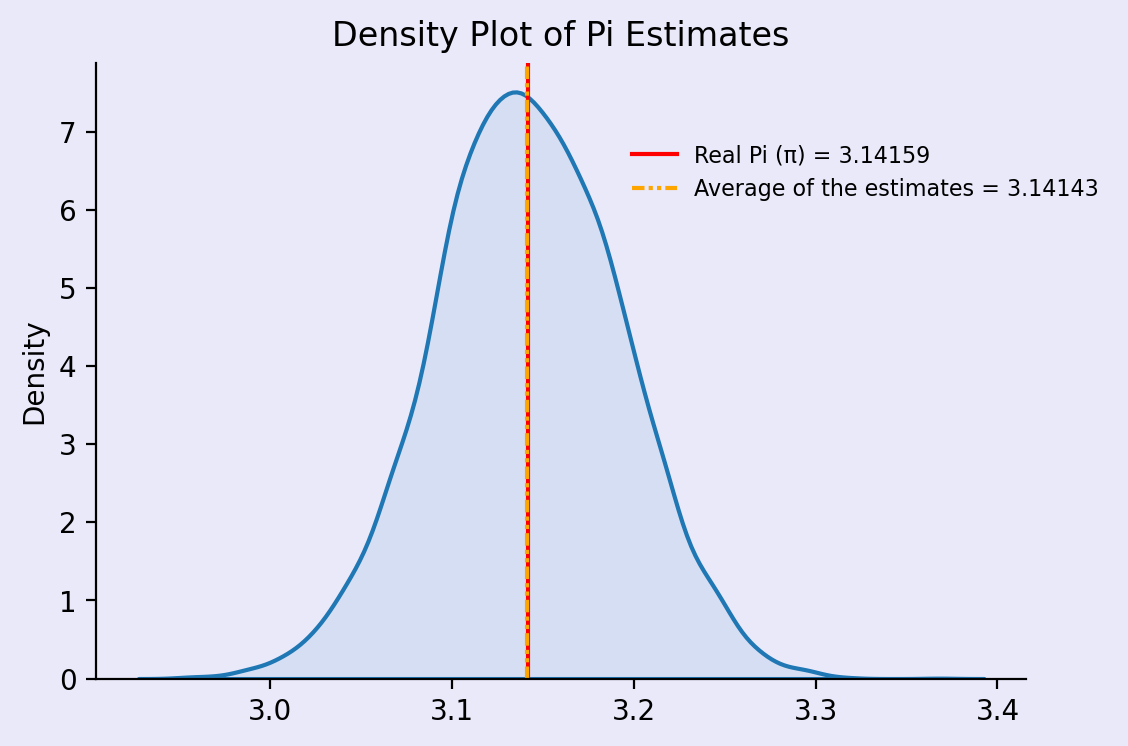

In [13]:
fig,ax = plt.subplots(figsize=(6,4),dpi=200)
fig.patch.set_facecolor('#E9E9FA')
ax.set_facecolor('#E9E9FA')

sns.kdeplot(pi_estimates,ax=ax,lw=1.5,fill=True,alpha=0.09)

ax.axvline(np.pi,color="r",label=f"Real Pi (π) = {np.round(np.pi,5)}")
ax.axvline(np.mean(pi_estimates),color="orange",lw=1.5,linestyle=(0, (3, 1, 1, 1, 1, 1)),label=f"Average of the estimates = {np.round(np.mean(pi_estimates),5)}")

ax.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.1, 0.9),fontsize=8)
sns.despine(ax=ax,top=True,right=True)

ax.set_title("Density Plot of Pi Estimates")